C:\Users\rajka\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - binary_accuracy: 0.9864 - loss: 0.0400 - val_binary_accuracy: 0.9962 - val_loss: 0.0119
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - binary_accuracy: 0.9961 - loss: 0.0112 - val_binary_accuracy: 0.9975 - val_loss: 0.0088
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - binary_accuracy: 0.9975 - loss: 0.0070 - val_binary_accuracy: 0.9978 - val_loss: 0.0090
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - binary_accuracy: 0.9984 - loss: 0.0045 - val_binary_accuracy: 0.9977 - val_loss: 0.0072
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - binary_accuracy: 0.9991 - loss: 0.0033 - val_binary_accuracy: 0.9974 - val_loss: 0.0095
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - binary_accuracy: 0.9987 - loss: 0.0038 - val_binary_accuracy: 0.9976 - val_loss: 0.0102
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - binary_accuracy: 0.9993 - loss: 0.0019 - val_binary_accuracy: 0.9980 - val_loss

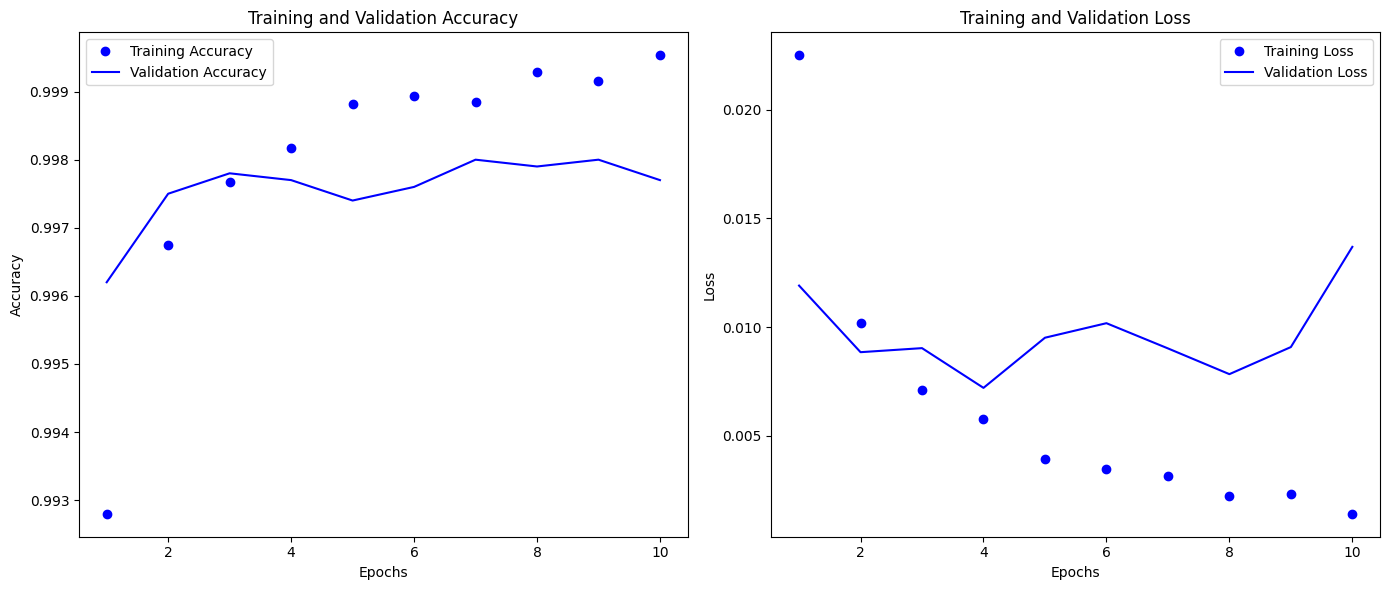

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import datasets
import numpy as np

# Loading the dataset (e.g., using MNIST or a similar dataset)
# This example uses the MNIST dataset for simplicity
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Preprocess the data (flatten images and normalize pixel values)
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

# Convert labels to binary (0 or 1) for simplicity (using binary classification as an example)
y_train = (y_train == 1).astype(int)  # Let's say we classify '1' versus not '1'
y_test = (y_test == 1).astype(int)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Extract the training and validation metrics from the history object
acc = history.history['binary_accuracy']  # Training accuracy
val_acc = history.history['val_binary_accuracy']  # Validation accuracy
loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

# Number of epochs
epochs = range(1, len(acc) + 1)  # Epochs are indexed starting from 1

# Create a figure with two subplots: one for accuracy, one for loss
plt.figure(figsize=(14, 6))

# Plotting training and validation accuracy in the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs, acc, 'bo', label='Training Accuracy')  # 'bo' means blue dots
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')  # 'b' means blue line
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss in the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs, loss, 'bo', label='Training Loss')  # 'bo' means blue dots
plt.plot(epochs, val_loss, 'b', label='Validation Loss')  # 'b' means blue line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()


In [8]:
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[4.6593365e-20],
       [4.0624764e-11],
       [9.9999958e-01],
       ...,
       [1.6912596e-17],
       [1.4669789e-16],
       [2.8660329e-38]], dtype=float32)